In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%jsroot on

Welcome to JupyROOT 6.22/00


In [2]:
def convert_th2fs_to_dataframe(file_name, dir_name):
    
    columns=['name', 'image']
    df  = pd.DataFrame(columns=columns)
    file = ROOT.TFile(file_name)
    file.cd(dir_name)
    total_energy = []
    
    for key in ROOT.gDirectory.GetListOfKeys():
        image = []
        if key.GetName() != "Info":
            calo_image_name = key.GetName()
            calo_image      = file.FindObjectAny(calo_image_name)
            #calo_image.Scale(1)
            #print(calo_image_name)
            for i in range(0, calo_image.GetNbinsX()):
                row   = []
                for j in range(0, calo_image.GetNbinsY()):
                    pix = float(calo_image.GetBinContent(i+1,j+1))
                    row.append(pix)
                image.append(row)
            #image = np.array(image)
            #print(image)
            sum = 0
            for row in image:
                sum += np.sum(row)
            
            if(sum > 0):
                df2 = pd.DataFrame([[calo_image_name, image]], columns=columns)
                df = df.append(df2, ignore_index=True)
    return df

In [3]:
data_geant = convert_th2fs_to_dataframe("./calo_images_geant4.root", "DQMData")
data_delphes = convert_th2fs_to_dataframe("./calo_images_delphes.root", "")

In [4]:
data_geant.head()

,name,image
0,calo_image_1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,calo_image_10,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,calo_image_100,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,calo_image_1000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,calo_image_1001,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [5]:
geant_labels = []
geant_images = []
geant4_names = data_geant["name"]
geant4_images = data_geant["image"]
for i in range(len(data_geant)):
    geant_labels.append(geant4_names[i])
    geant_images.append(geant4_images[i])
    

In [6]:
delphes_labels = []
delphes_images = []
names = data_delphes["name"]
images = data_delphes["image"]
for i in range(len(data_geant)):
    delphes_labels.append(names[i])
    delphes_images.append(images[i])

In [7]:
len(geant_labels)

1562

In [8]:
len(delphes_labels)

1562

In [9]:
np.array(geant_images).shape

(1562, 57, 72)

In [24]:

geant_images_orig = np.array(geant_images)
delphes_images_orig = np.array(delphes_images)

geant_dict = {}
for label, image in zip(geant_labels, geant_images):
    geant_dict[label] = np.array(image)

delphes_dict = {}
for label, image in zip(delphes_labels, delphes_images):
    delphes_dict[label] = np.array(image)
    
m = geant_images_orig.shape[0] # number of examples

geant_images = geant_images_orig.reshape(m, -1).T 
delphes_images = delphes_images_orig.reshape(m, -1).T

In [25]:
m = len(geant_labels)

ordered_geant_images = []
ordered_delphes_images = []

for i in range(0,m):
    my_str = "calo_image_"
    ordered_geant_images.append(geant_dict[my_str + str(i+1)])
    ordered_delphes_images.append(delphes_dict[my_str + str(i)])

In [26]:
#u = np.sum(np.array(ordered_delphes_images), axis=(1,2))
#v = np.sum(np.array(ordered_geant_images), axis=(1,2))


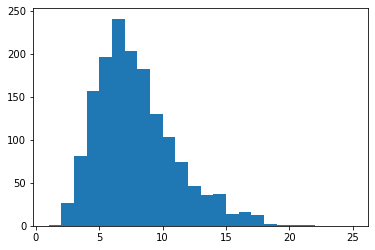

In [27]:
## Ordered image distances
m = len(geant_labels)

distances = []
for i in range(0,m):
    n = np.random.choice(list(range(0,m)))
    my_str = "calo_image_"
    geant = geant_dict[my_str + str(i+1)]
    delphes = delphes_dict[my_str + str(i)]
    distance = np.sum((geant/np.max(geant) - delphes/np.max(delphes))**2)
    #print(distance)
    distances.append(distance)
A = np.array(distances)
_ = plt.hist(A, bins = np.arange(1,26,1))

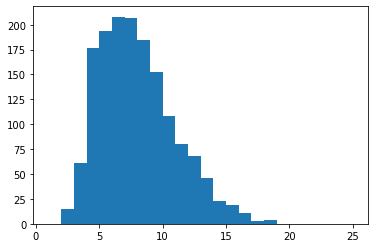

In [42]:
## Random image distances
d = delphes_images.T
g = geant_images.T

#seed(15)

np.random.shuffle(d)
np.random.shuffle(g)

d_max = np.max(d, axis=1, keepdims=True)
g_max = np.max(g, axis=1, keepdims=True)

B = np.sum((d/d_max - g/g_max)**2, axis = 1)
_ = plt.hist(B, bins = np.arange(1,26,1))

In [36]:
"""
# normalization

mu_g = np.sum(geant_images, axis = 1, keepdims=True)/m
geant_images = geant_images - mu_g
var_g = 1/m*np.sum(geant_images**2, axis=1, keepdims=1)
geant_images = geant_images/((var_g+1e-6)**0.5)

mu_d = np.sum(delphes_images, axis = 1, keepdims=True)/m
delphes_images = delphes_images - mu_d
var_d = 1/m*np.sum(delphes_images**2, axis=1, keepdims=1)
delphes_images = delphes_images/((var_d+1e-6)**0.5)
"""


'\n# normalization\n\nmu_g = np.sum(geant_images, axis = 1, keepdims=True)/m\ngeant_images = geant_images - mu_g\nvar_g = 1/m*np.sum(geant_images**2, axis=1, keepdims=1)\ngeant_images = geant_images/((var_g+1e-6)**0.5)\n\nmu_d = np.sum(delphes_images, axis = 1, keepdims=True)/m\ndelphes_images = delphes_images - mu_d\nvar_d = 1/m*np.sum(delphes_images**2, axis=1, keepdims=1)\ndelphes_images = delphes_images/((var_d+1e-6)**0.5)\n'

In [51]:
#min_energy, max_energy = 1, 5
#bins = 2
#hist_info = {"bins": bins, "range": (min_energy, max_energy)}

def histogram_features(geant_image, delphes_image, hist_info):
    bins = hist_info["bins"]
    range_ = hist_info["range"]
    g_hist, _ = np.histogram(geant_image, bins, range = range_, density=True)
    d_hist, _ = np.histogram(delphes_image, bins, range = range_, density=True)
    return g_hist, d_hist


def jeffery_distance(g_hist, d_hist):
    m = (g_hist + d_hist)/2
    eps = 1e-10
    a = g_hist*np.log((g_hist+eps)/(m+eps))
    b = d_hist*np.log((d_hist+eps)/(m+eps))
    return np.sum(a+b)


def find_distances(geant_image, delphes_images, hist_info, method="mse"):
    if method == "mse": # mean squared error
        g_max = np.max(geant_image)
        d_max = np.max(delphes_images, axis=0, keepdims=True)
        distances = np.sum((geant_image/g_max - delphes_images/d_max)**2, axis=0, 
                           keepdims=False)/geant_image.shape[0]
        return list(distances)
    
    if method == "jd": #jeffery distance
        m = delphes_images.shape[1]
        distances = []
        for i in range(0,m):
            delphes_image = delphes_images[:,i]
            g_hist, d_hist = histogram_features(geant_image, delphes_image, hist_info)
            distances.append(jeffery_distance(g_hist, d_hist))
        return distances

        
def n_closest_images(delphes_labels, distances, n):
    distances_and_delphes_labels = list(zip(distances,delphes_labels))
    distances_and_delphes_labels.sort()
    return distances_and_delphes_labels[0:n]


def match_geant_to_delphes(geant_images, delphes_images, geant_labels, delphes_labels,
                           n, hist_info, method):
    match_images = {}
    m = len(geant_labels)
    assert(m == geant_images.shape[1])
    
    for i in range(0, m):
        geant_image = geant_images[:,i].reshape(-1, 1)
        distances = find_distances(geant_image, delphes_images, hist_info, method)
        n_distances_and_delphes_labels = n_closest_images(delphes_labels, distances, n)
        
        geant_label = geant_labels[i]
        match_images[geant_label] = n_distances_and_delphes_labels
        if i%100 == 0:
            print("iteration:", i)
            #print(geant_label,match_images[geant_label])
    return match_images

In [61]:
min_energy = np.min([np.min(geant_images), np.min(delphes_images)])
max_energy = np.max([np.max(geant_images), np.max(delphes_images)])
bins = 500
hist_info = {"bins": bins, "range": (min_energy, max_energy)}
n=10 #closest images number
method = "mse"
# method = "jd" # Vectorization haven't been done. So, takes longer compared to "mse"

match_images = match_geant_to_delphes(geant_images, delphes_images, 
                                            geant_labels, delphes_labels, n, hist_info, method)

iteration: 0
iteration: 100
iteration: 200
iteration: 300
iteration: 400
iteration: 500
iteration: 600
iteration: 700
iteration: 800
iteration: 900
iteration: 1000
iteration: 1100
iteration: 1200
iteration: 1300
iteration: 1400
iteration: 1500


In [59]:
match_images["calo_image_5"]

[(0.001118276625059011, 'calo_image_688'),
 (0.0011792467349633583, 'calo_image_50'),
 (0.001215622046342829, 'calo_image_1399'),
 (0.001248913964338502, 'calo_image_1484'),
 (0.0012627255203309332, 'calo_image_191'),
 (0.0012632707705413767, 'calo_image_638'),
 (0.001263442808728, 'calo_image_69'),
 (0.0012742691830019619, 'calo_image_535'),
 (0.0012745284512623786, 'calo_image_1295'),
 (0.0012747620297709039, 'calo_image_1487')]